In [677]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import random
import math

import numpy as np
np.random.seed(1)
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.utils import np_utils
from keras.optimizers import SGD
from keras.callbacks import EarlyStopping
#%matplotlib notebook

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error

from numpy.linalg import inv
from numpy import linalg as LA
from scipy import linalg
import random

from matplotlib import animation, rc
from IPython.display import HTML

In [694]:
i=0
df_D = pd.read_csv('C:/Users/endrep/Documents/training_batches/D' + str(i+1) + '.csv')
df_F = pd.read_csv('C:/Users/endrep/Documents/training_batches/F' + str(i+1) + '.csv')

In [695]:
df_D.values.shape

(5000, 20)

In [696]:
#F=[]
#D=[]
DF = []
d = 5
for i in range(d):
    if i == 0:
        F = df_F.shift(d-i).values
        D = df_D.shift(d-i).values
        
        DF = np.concatenate((F,D), axis = 1)
    else:
        #F = np.concatenate((F, df_F.shift(i+1).values), axis=1)
        #D = np.concatenate((D, df_D.shift(i+1).values), axis=1)
        DF = np.concatenate((DF, df_F.shift(d-i).values, df_D.shift(d-i).values), axis=1)

#DF = np.concatenate((F, D), axis = 1)
#DF=D

In [697]:
DF = DF[d:,:]

Dy = df_D.values
Dy = Dy[d:,:]

dim = np.shape(Dy)

In [698]:
x = np.linspace(0,1, dim[1])
n_nodes = dim[1]

In [699]:
#Normalizing
x_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()
DFscaled = x_scaler.fit_transform(DF)
Dyscaled = y_scaler.fit_transform(Dy)


In [700]:
DF.shape

(4995, 200)

In [701]:
df_D.values[0:5,-1]

array([  7.91620000e-06,   2.12230000e-05,   3.84770000e-05,
         5.88540000e-05,   8.17800000e-05])

In [702]:
pd.DataFrame(DF[0:6,40::41])

,0,1,2,3
0,0.0001,0.0001,0.000100,0.000100
1,0.0001,0.0001,0.000100,0.000100
2,0.0001,0.0001,0.000100,0.000100
3,0.0001,0.0001,0.000100,0.000100
4,0.0001,0.0001,0.000100,0.000099
5,0.0001,0.0001,0.000099,0.000099


In [703]:
X_train = DFscaled
Y_train = Dyscaled

#Train test split
train_portion = 0.8
n_timesteps = len(X_train[:,0])
x_train = X_train[0:int(n_timesteps*train_portion),:]
x_test = X_train[int(n_timesteps*(train_portion)):,:]
y_train = Y_train[0:int(n_timesteps*train_portion),:]
y_test = Y_train[int(n_timesteps*(train_portion)):,:]

In [704]:
n_features = int(x_train.shape[1]/d)
x_train = x_train.reshape((x_train.shape[0], d, n_features))
x_test = x_test.reshape((x_test.shape[0], d, n_features))

In [705]:
y_test.shape

(999, 20)

In [706]:
x_scaler.inverse_transform(DFscaled)

array([[  9.99980000e-05,   9.99980000e-05,   9.99980000e-05, ...,
          3.17600000e-05,   5.46770000e-05,   8.17800000e-05],
       [  9.99820000e-05,   9.99820000e-05,   9.99820000e-05, ...,
          4.58040000e-05,   7.41310000e-05,   1.06810000e-04],
       [  9.99510000e-05,   9.99510000e-05,   9.99510000e-05, ...,
          6.19040000e-05,   9.55250000e-05,   1.33560000e-04],
       ..., 
       [  9.95560000e-05,   9.95560000e-05,   9.95560000e-05, ...,
         -4.60750000e-04,  -5.35360000e-04,  -6.05970000e-04],
       [  9.96670000e-05,   9.96670000e-05,   9.96670000e-05, ...,
         -4.04690000e-04,  -4.51900000e-04,  -4.94810000e-04],
       [  9.97610000e-05,   9.97610000e-05,   9.97610000e-05, ...,
         -3.46430000e-04,  -3.65980000e-04,  -3.80950000e-04]])

In [707]:
#x_train = x_train.reshape((1, x_train.shape[0], x_train.shape[1]))
#x_test = x_test.reshape((1, x_test.shape[0], x_test.shape[1]))

In [708]:
def get_error(predictions, y_test):
    #Total error
    error = 0
    for i in range(len(predictions[:,0])):
        #for j in range(d):
        error += np.trapz((y_test[i,:] - predictions[i,:])**2, x)
        #error += K.mean(K.square(predictions - y_test), axis=-1)
    
    return error

In [709]:
#y_train = y_train.reshape((1, y_train.shape[0], y_train.shape[1]))

In [710]:
#Define model
model = Sequential()
model.add(LSTM(100, input_shape=(x_train.shape[1], x_train.shape[2]),))
#model.add(LSTM(100, input_shape=(None, x_train.shape[2]),))
model.add(Dense(len(y_train[0,:])))
model.compile(loss='mae', optimizer='adam')

# define early stopping callback
earlystop = EarlyStopping(monitor='loss', min_delta=0.0001, patience=5, verbose=1, mode='auto')
callback_list = [earlystop]
model_history = model.fit(x_train, y_train, epochs=100, callbacks=callback_list, batch_size=len(x_train), verbose=1, shuffle=False)
#model.fit(x_train, y_train, epochs=100, batch_size=200, verbose=1, shuffle=False)

Epoch 1/100
3996/3996 [==============================] - 4s 1ms/step - loss: 0.5422
Epoch 2/100
3996/3996 [==============================] - 0s 116us/step - loss: 0.4888
Epoch 3/100
3996/3996 [==============================] - 0s 107us/step - loss: 0.4391
Epoch 4/100
3996/3996 [==============================] - 0s 107us/step - loss: 0.3937
Epoch 5/100
3996/3996 [==============================] - 0s 97us/step - loss: 0.3533
Epoch 6/100
3996/3996 [==============================] - 0s 109us/step - loss: 0.3190
Epoch 7/100
3996/3996 [==============================] - 0s 112us/step - loss: 0.2893
Epoch 8/100
3996/3996 [==============================] - 0s 102us/step - loss: 0.2644
Epoch 9/100
3996/3996 [==============================] - 0s 100us/step - loss: 0.2445
Epoch 10/100
3996/3996 [==============================] - 0s 106us/step - loss: 0.2289
Epoch 11/100
3996/3996 [==============================] - 0s 120us/step - loss: 0.2171
Epoch 12/100
3996/3996 [==============================]

Epoch 96/100
3996/3996 [==============================] - 1s 129us/step - loss: 0.0165
Epoch 97/100
3996/3996 [==============================] - 0s 108us/step - loss: 0.0163
Epoch 98/100
3996/3996 [==============================] - 1s 125us/step - loss: 0.0161
Epoch 99/100
3996/3996 [==============================] - 1s 144us/step - loss: 0.0160
Epoch 100/100
3996/3996 [==============================] - 1s 146us/step - loss: 0.0159


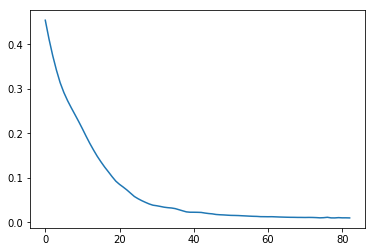

In [680]:
plt.plot(model_history.history['loss'])

In [594]:
'''
#Stateful model
print('Build STATEFUL model...')
model = Sequential()
model.add(LSTM(10, batch_input_shape=(1, 1, 1), return_sequences=False, stateful=True))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
'''

"\n#Stateful model\nprint('Build STATEFUL model...')\nmodel = Sequential()\nmodel.add(LSTM(10, batch_input_shape=(1, 1, 1), return_sequences=False, stateful=True))\nmodel.add(Dense(1, activation='sigmoid'))\nmodel.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])\n"

In [595]:
#x_train.shape

In [596]:
'''
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1],1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1],1))
print(x_train.shape)
print(y_train.shape)
'''

'\nx_train = x_train.reshape((x_train.shape[0], x_train.shape[1],1))\nx_test = x_test.reshape((x_test.shape[0], x_test.shape[1],1))\nprint(x_train.shape)\nprint(y_train.shape)\n'

In [597]:
'''
print('Train stateful...')
for epoch in range(15):
    mean_tr_acc = []
    mean_tr_loss = []
    for i in range(len(x_train)):
        y_true = y_train[i]
        for j in range(len(x_train[0,:])):
            tr_loss, tr_acc = model.train_on_batch(np.expand_dims(np.expand_dims(X_train[i][j], axis=1), axis=1),
                                                   np.array([y_true]))
            mean_tr_acc.append(tr_acc)
            mean_tr_loss.append(tr_loss)
        model.reset_states()

    print('accuracy training = {}'.format(np.mean(mean_tr_acc)))
    print('loss training = {}'.format(np.mean(mean_tr_loss)))
    print('___________________________________')
'''

"\nprint('Train stateful...')\nfor epoch in range(15):\n    mean_tr_acc = []\n    mean_tr_loss = []\n    for i in range(len(x_train)):\n        y_true = y_train[i]\n        for j in range(len(x_train[0,:])):\n            tr_loss, tr_acc = model.train_on_batch(np.expand_dims(np.expand_dims(X_train[i][j], axis=1), axis=1),\n                                                   np.array([y_true]))\n            mean_tr_acc.append(tr_acc)\n            mean_tr_loss.append(tr_loss)\n        model.reset_states()\n\n    print('accuracy training = {}'.format(np.mean(mean_tr_acc)))\n    print('loss training = {}'.format(np.mean(mean_tr_loss)))\n    print('___________________________________')\n"

In [711]:
preds = y_scaler.inverse_transform(model.predict(x_test))
y_test_u = y_scaler.inverse_transform(y_test)

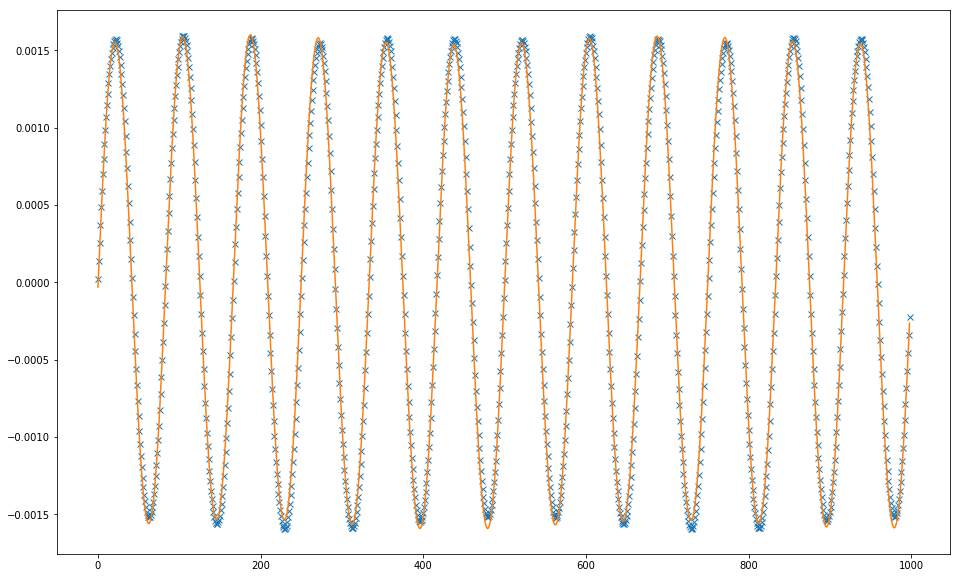

In [712]:
plt.figure(figsize=(16,10))
plt.plot(preds[:,-1], 'x')
plt.plot(y_test_u[:,-1])
plt.show()

In [713]:
print(get_error(y_test_u, preds))

8.68675958264e-07


In [715]:
predictions = y_scaler.inverse_transform(model.predict(x_train))
y_train_u = y_scaler.inverse_transform(y_train)

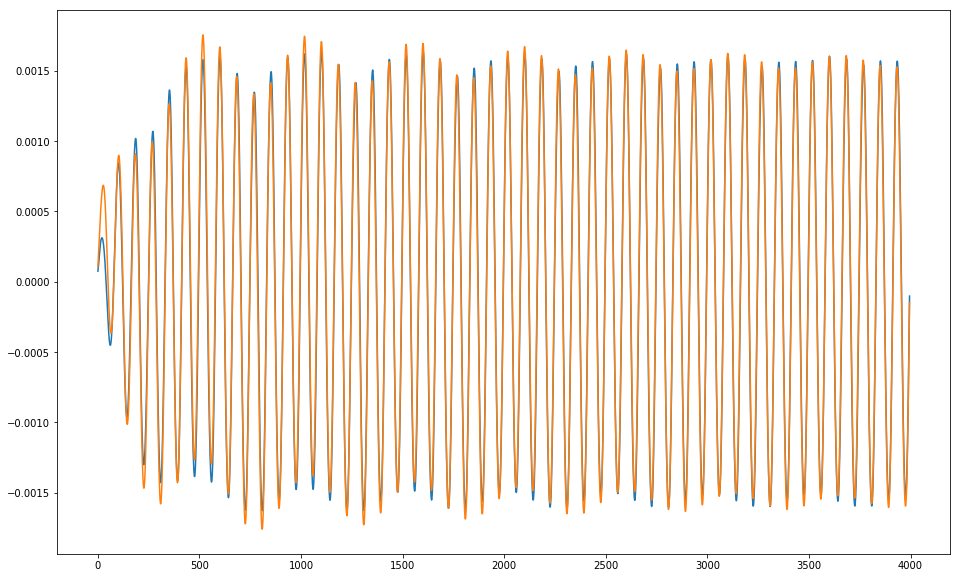

In [716]:
plt.figure(figsize=(16,10))
plt.plot(predictions[:,-1], '-')
plt.plot(y_train_u[:, -1])
plt.show()

In [717]:
print(get_error(y_train_u, predictions))

6.41621061058e-06


In [723]:
#Independent predictions

input_i = np.copy(x_test[0,:,:])
input_i_reshaped = input_i.reshape((1,d,n_features))

#input_dim = x_test[0,:,:].shape

future_timesteps = 990
preds = np.zeros([future_timesteps, n_nodes])

force = np.copy(x_test[:,:,:(n_nodes)])
#model.reset_states()
for i in range(future_timesteps): 
    pred = model.predict(input_i_reshaped)
    preds[i, :] = pred[0]
    
    input_i[0:d-1,:] = input_i[1:d,:]
    input_i[d-1,:n_nodes] = force[i+1,d-1,:]
    input_i[d-1,n_nodes:] = pred[0]
    
    input_i_reshaped = input_i.reshape((1,d,n_features))

In [724]:
predictions = y_scaler.inverse_transform(preds)
y_train_u = y_scaler.inverse_transform(y_train)

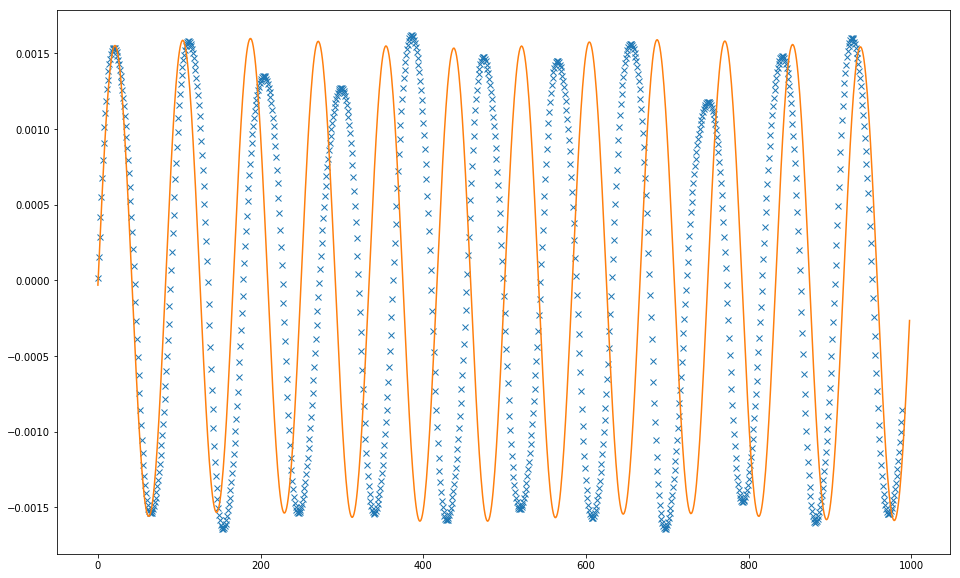

In [725]:
plt.figure(figsize=(16,10))
plt.plot(predictions[:,-1], 'x')
plt.plot(y_test_u[:, -1])
plt.show()

In [519]:
print(get_error(y_test_u[0:len(predictions[:,0]),:], predictions))

0.00833773629875


In [550]:
print(predictions[0,-1])
print(y_test_u[0,-1])
#scaler.inverse_transform(x_test.reshape((int(n_timesteps/d), n_features*2*10)))
x_scaler.inverse_transform(x_test)

-0.00023465405342
0.0029079


ValueError: Found array with dim 3. Estimator expected <= 2.

In [656]:
#Export results
np.savetxt("predictions.csv", predictions, delimiter=",")
np.savetxt("preds.csv", preds, delimiter=",")
np.savetxt("y_test.csv", y_test_u, delimiter=",")
np.savetxt("y_train.csv", y_train_u, delimiter=",")

In [328]:
preds.shape

(200, 21)